# Timber Harvesting -- using 2 nodes

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demdp01a.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Profit maximizing owner of a commercial tree stand must decide when to clearcut the stand.


In [1]:
import numpy as np
from compecon import NLP, demo
import matplotlib.pyplot as plt

In [2]:
price = 1.0  # price of biomass
kappa = 0.2  # clearcut-replant cost
smax  = 0.5  # stand carrying capacity
gamma = 0.1  # biomass growth parameter
delta = 0.9  # discount factor

### Code the growth function

In [3]:
snodes = np.array([0.2, 0.4])

In [4]:
def h(s): return s + gamma*(smax - s)

## SOLUTION

### Code the approximant and the residual

In [5]:
def vhat(c, s): return c[0] + c[1]*s
def vhat1(c,s): return price*s - kappa + delta * vhat(c,h(0))
def vhat0(c,s): return delta * vhat(c, h(s))

def resid(c,s=snodes): return vhat(c,s) - np.maximum(vhat0(c,s), vhat1(c,s))

### Solve collocation equation

In [6]:
cc = NLP(resid).broyden(np.zeros(2))

### Compute critical biomass

In [7]:
scrit = NLP(lambda s: vhat0(cc,s)-vhat1(cc,s)).broyden(0.0)[0]
scrit

0.3619999999996372

## ANALYSIS

### Compute refined state grid

In [8]:
ss = np.linspace(0,smax,1000)

### Plot Conditional Value Functions

Optimal Biomass Harvest Level = 0.3620


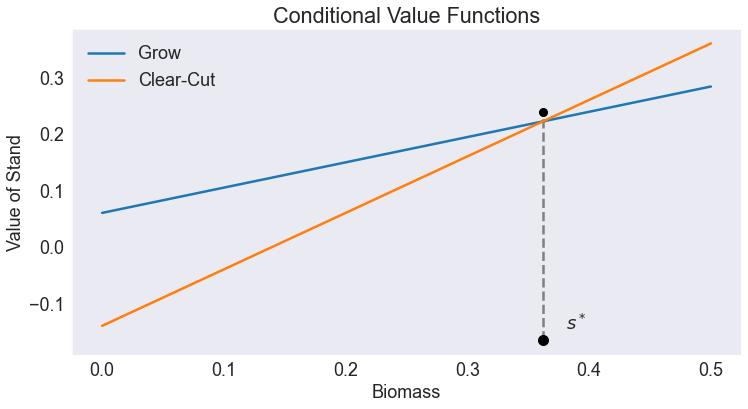

In [9]:
fig1 =demo.figure('Conditional Value Functions','Biomass','Value of Stand')
plt.plot(ss,vhat0(cc,ss),label='Grow')
plt.plot(ss,vhat1(cc,ss),label='Clear-Cut')
plt.legend()

vcrit = vhat(cc,scrit)
ymin = plt.ylim()[0]
plt.vlines(scrit, ymin,vcrit,'grey',linestyles='--')
demo.annotate(scrit,ymin,'$s^*$',ms=10)
demo.bullet(scrit,vcrit)
print(f'Optimal Biomass Harvest Level = {scrit:.4f}') 

### Plot Value Function Residual

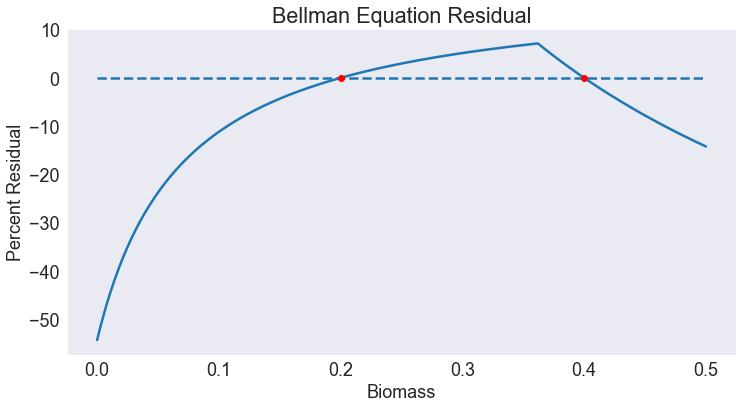

In [10]:
fig2 = demo.figure('Bellman Equation Residual', 'Biomass', 'Percent Residual')
plt.plot(ss, 100*resid(cc,ss) / vhat(cc,ss))
plt.hlines(0,0,smax,linestyles='--')
plt.plot(snodes,resid(cc),'ro')

### Compute ergodic mean annual harvest 

In [11]:
s = h(0)
for n in range(100):
    if s > scrit: break
    s = h(s)
    
print(f'Ergodic Mean Annual Harvest = {s/n:.4f} after {n+1} iterations') 

Ergodic Mean Annual Harvest = 0.0311 after 13 iterations


In [12]:
#demo.savefig([fig1,fig2])